In [1]:
from pygam import LinearGAM, s, f
from datasets import load_diabetes
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
from tools import model_performance

In [2]:
df_original, df_train, df_test = load_diabetes()

In [3]:
train_X = df_train.drop(['target'], axis=1)
train_y = df_train['target']
test_X = df_test.drop(['target'], axis=1)
test_y = df_test['target']
original_X = df_original.drop(['target'], axis=1)
original_y = df_original['target']
features = train_X.columns

In [4]:
len(features)

10

## Spline terms

In [5]:
model = LinearGAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9))
model.gridsearch(train_X.values, train_y.values)
model.summary()

100% (11 of 11) |########################| Elapsed Time: 0:00:01 Time:  0:00:01
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     17.3771
Link Function:                     IdentityLink Log Likelihood:                                 -2741.9613
Number of Samples:                          309 AIC:                                             5520.6767
                                                AICc:                                            5523.1357
                                                GCV:                                             3167.4555
                                                Scale:                                           2848.5263
                                                Pseudo R-Squared

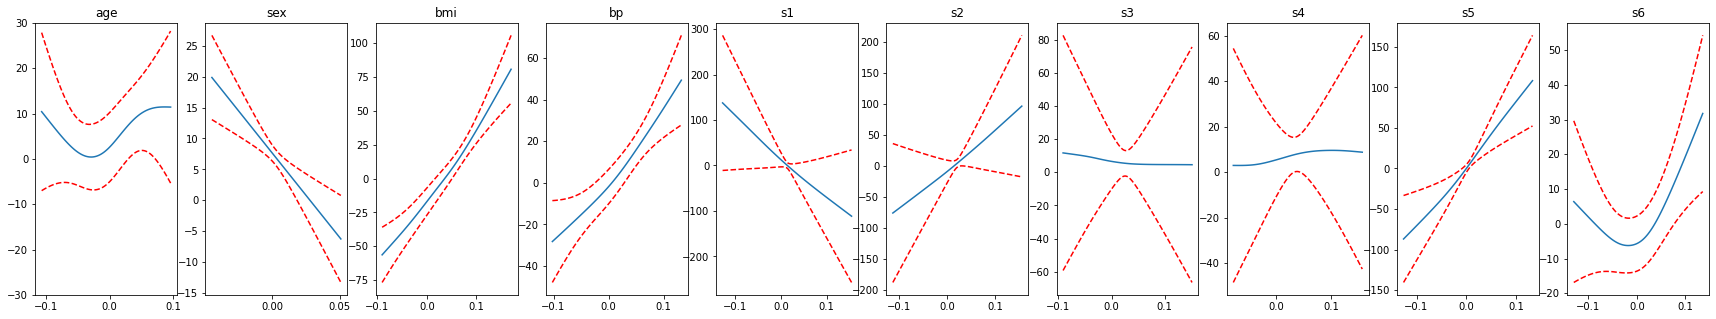

In [6]:
titles = train_X.columns

fig, axs = plt.subplots(1, len(titles), figsize=(30,5))

for i, ax in enumerate(axs):
    XX = model.generate_X_grid(term=i)
    ax.plot(XX[:, i], model.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], model.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    if i == 0:
        ax.set_ylim(-30,30)
    ax.set_title(titles[i])

In [7]:
# feature z feature selection
model = LinearGAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5))
model.gridsearch(train_X[['sex', 'bmi', 'bp', 's1', 's2', 's5']].values, train_y.values)
model.summary()

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     10.6662
Link Function:                     IdentityLink Log Likelihood:                                 -2748.7712
Number of Samples:                          309 AIC:                                             5520.8748
                                                AICc:                                            5521.8721
                                                GCV:                                             3104.2645
                                                Scale:                                           2911.9998
                                                Pseudo R-Squared

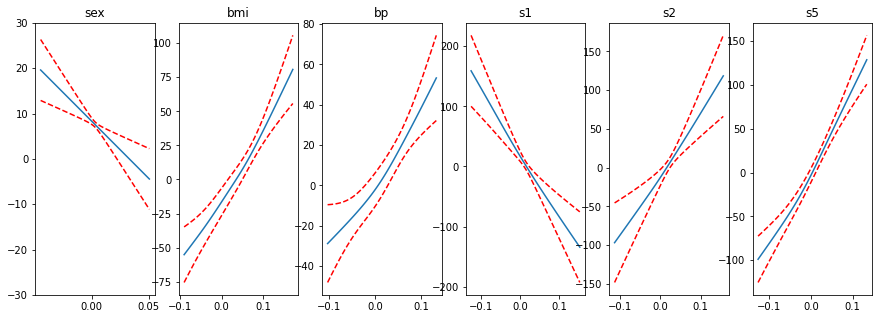

In [8]:
# holding all fixed
titles = train_X[['sex', 'bmi', 'bp', 's1', 's2', 's5']].columns

fig, axs = plt.subplots(1, len(titles), figsize=(15,5))

for i, ax in enumerate(axs):
    XX = model.generate_X_grid(term=i)
    ax.plot(XX[:, i], model.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], model.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    if i == 0:
        ax.set_ylim(-30,30)
    ax.set_title(titles[i])